In [1]:
import qiskit

In [2]:
from qiskit import IBMQ, Aer
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import numpy as np

In [3]:
from qiskit.visualization import array_to_latex
from qiskit.providers.aer import StatevectorSimulator

# Gidney Toffoli Qubit based construction

In [4]:
#Toffoli AND via qubits acc to  Gidney construction

def Gidney_T():
    n=3
    T=QuantumCircuit(n,n)
    #initialize qubits here
    T.x(0)
    T.x(1)
    

    #Gidney construction starts from here
    T.h(2)
    for i in range(2):
        T.cx(1,2)
        T.tdg(2)
        T.cx(0,2)
        T.t(2)
        T.barrier()
    T.t(1)
    T.cx(0,1)
    T.t(0)
    T.tdg(1)
    T.cx(0,1)
    T.h(2) 
    #T.s(2)
    for i in range(n):
        T.measure(i,i)
    return T
    

circuit Depth =  14


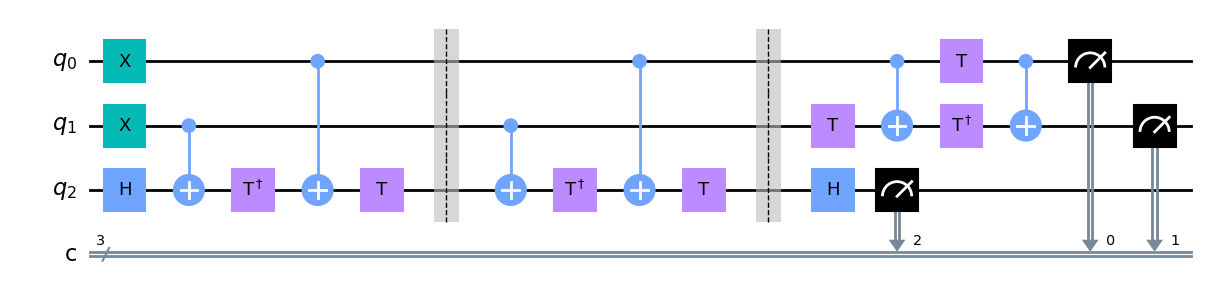

In [5]:
toffoli = Gidney_T()
print('circuit Depth = ', toffoli.depth())
toffoli.draw(output="mpl")

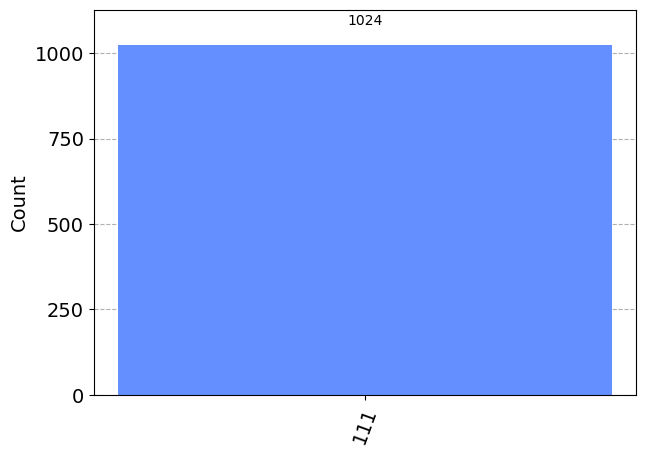

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_toffoli = transpile(toffoli, aer_sim)
results = aer_sim.run(transpiled_toffoli).result()
answer = results.get_counts()
plot_histogram(answer)